<a href="https://colab.research.google.com/github/693080593/research/blob/master/Extractant_HHV_(Blank)_Stratified_Test_Set_Multi_split_041621_%5B3%5D_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Extrantant Type Effect on Biocrude Yield HHV ER 041621 Stratified Test.csv')
Original_Oil_HHV = data['Bio-crude Oil HHV']
Original_Features = data.drop(['Dichloromethane','Toluene','Acetone','Tetrahydrofuran','Methanol','Hexane','Diethyl Ether','Chloroform','Ethyl Acetate',
                                'Bio-crude Oil Yield','Bio-crude Oil HHV','Bio-crude Oil ER'], axis = 1)

data_figure = data.drop(['Dichloromethane','Toluene','Acetone','Tetrahydrofuran','Methanol','Hexane','Diethyl Ether','Chloroform','Ethyl Acetate',
                          'Bio-crude Oil Yield','Bio-crude Oil ER','Group'], axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data_figure.shape))
data_figure.shape

data_figure[:517:11]


Bio-crude dataset has 316 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.00
11,41.000000,35.000000,0.000000,0.000000,12.000000,0.000000,6.521739,40.80
22,17.830000,30.060000,0.000000,0.000000,54.170000,0.000000,2.100000,34.37
33,21.760000,14.260000,0.000000,0.000000,56.970000,0.000000,7.000000,34.60
44,13.000000,56.000000,6.000000,15.000000,4.000000,0.000000,6.000000,35.50
55,2.300000,61.800000,0.000000,0.000000,26.700000,0.000000,8.700000,33.80
66,13.880000,46.940000,0.000000,0.000000,28.000000,0.000000,3.470000,32.20
77,13.900000,54.500000,0.000000,0.000000,10.000000,0.000000,7.500000,36.00
88,4.325300,25.576050,0.000000,0.000000,43.678850,0.000000,16.500000,35.92
99,6.200000,67.440000,0.000000,0.000000,15.280000,0.000000,11.080000,38.28


In [ ]:
# MinMaxScale
#from sklearn.preprocessing import MinMaxScaler
#from pandas import DataFrame

#data_MinMax = data2.drop(['Dichloromethane','Toluene','Acetone','Tetrahydrofuran','Methanol','Hexane','Diethyl Ether','Chloroform','Ethyl Acetate',
#                          'Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','Bio-crude Oil Yield',
#                         'Bio-crude Oil ER','Group'], axis = 1)

#scaler = MinMaxScaler()

#print(scaler.fit(data_MinMax))

#print(scaler.data_max_)
#print(scaler.data_min_)

#data_MinMax3 = scaler.transform(data_MinMax)

#data_MinMax2 = pd.DataFrame(data = data_MinMax3*100,  columns =["Bio-crude Oil HHV"])

#print(data_MinMax2)

#Original_Oil_HHV = data_MinMax2

#Original_Features = pd.concat([data2['Lipid'],data2['Protein'],data2['Cellulose'],data2['Hemicellulose'],data2['Carbohydrate'],data2['Lignin'],data2['Ash'],data_MinMax2, data2['Group']], axis=1)

#data=pd.concat([Original_Features, data2['Bio-crude Oil Yield']], axis=1)

#data_figure_new=data.drop('Group', axis = 1)

#data[:517:11]

#Original_Features[:511:11]

#Original_Oil_HHV[:511:11]
#Original_Oil_HHV.info()

MinMaxScaler(copy=True, feature_range=(0, 1))
[42.2]
[17.747785]
     Bio-crude Oil HHV
0            74.644424
1            97.955195
2            95.910391
3            89.694185
4            92.556912
..                 ...
311          53.869210
312          46.800662
313          74.235463
314          59.512870
315          43.318018

[316 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bio-crude Oil HHV  316 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


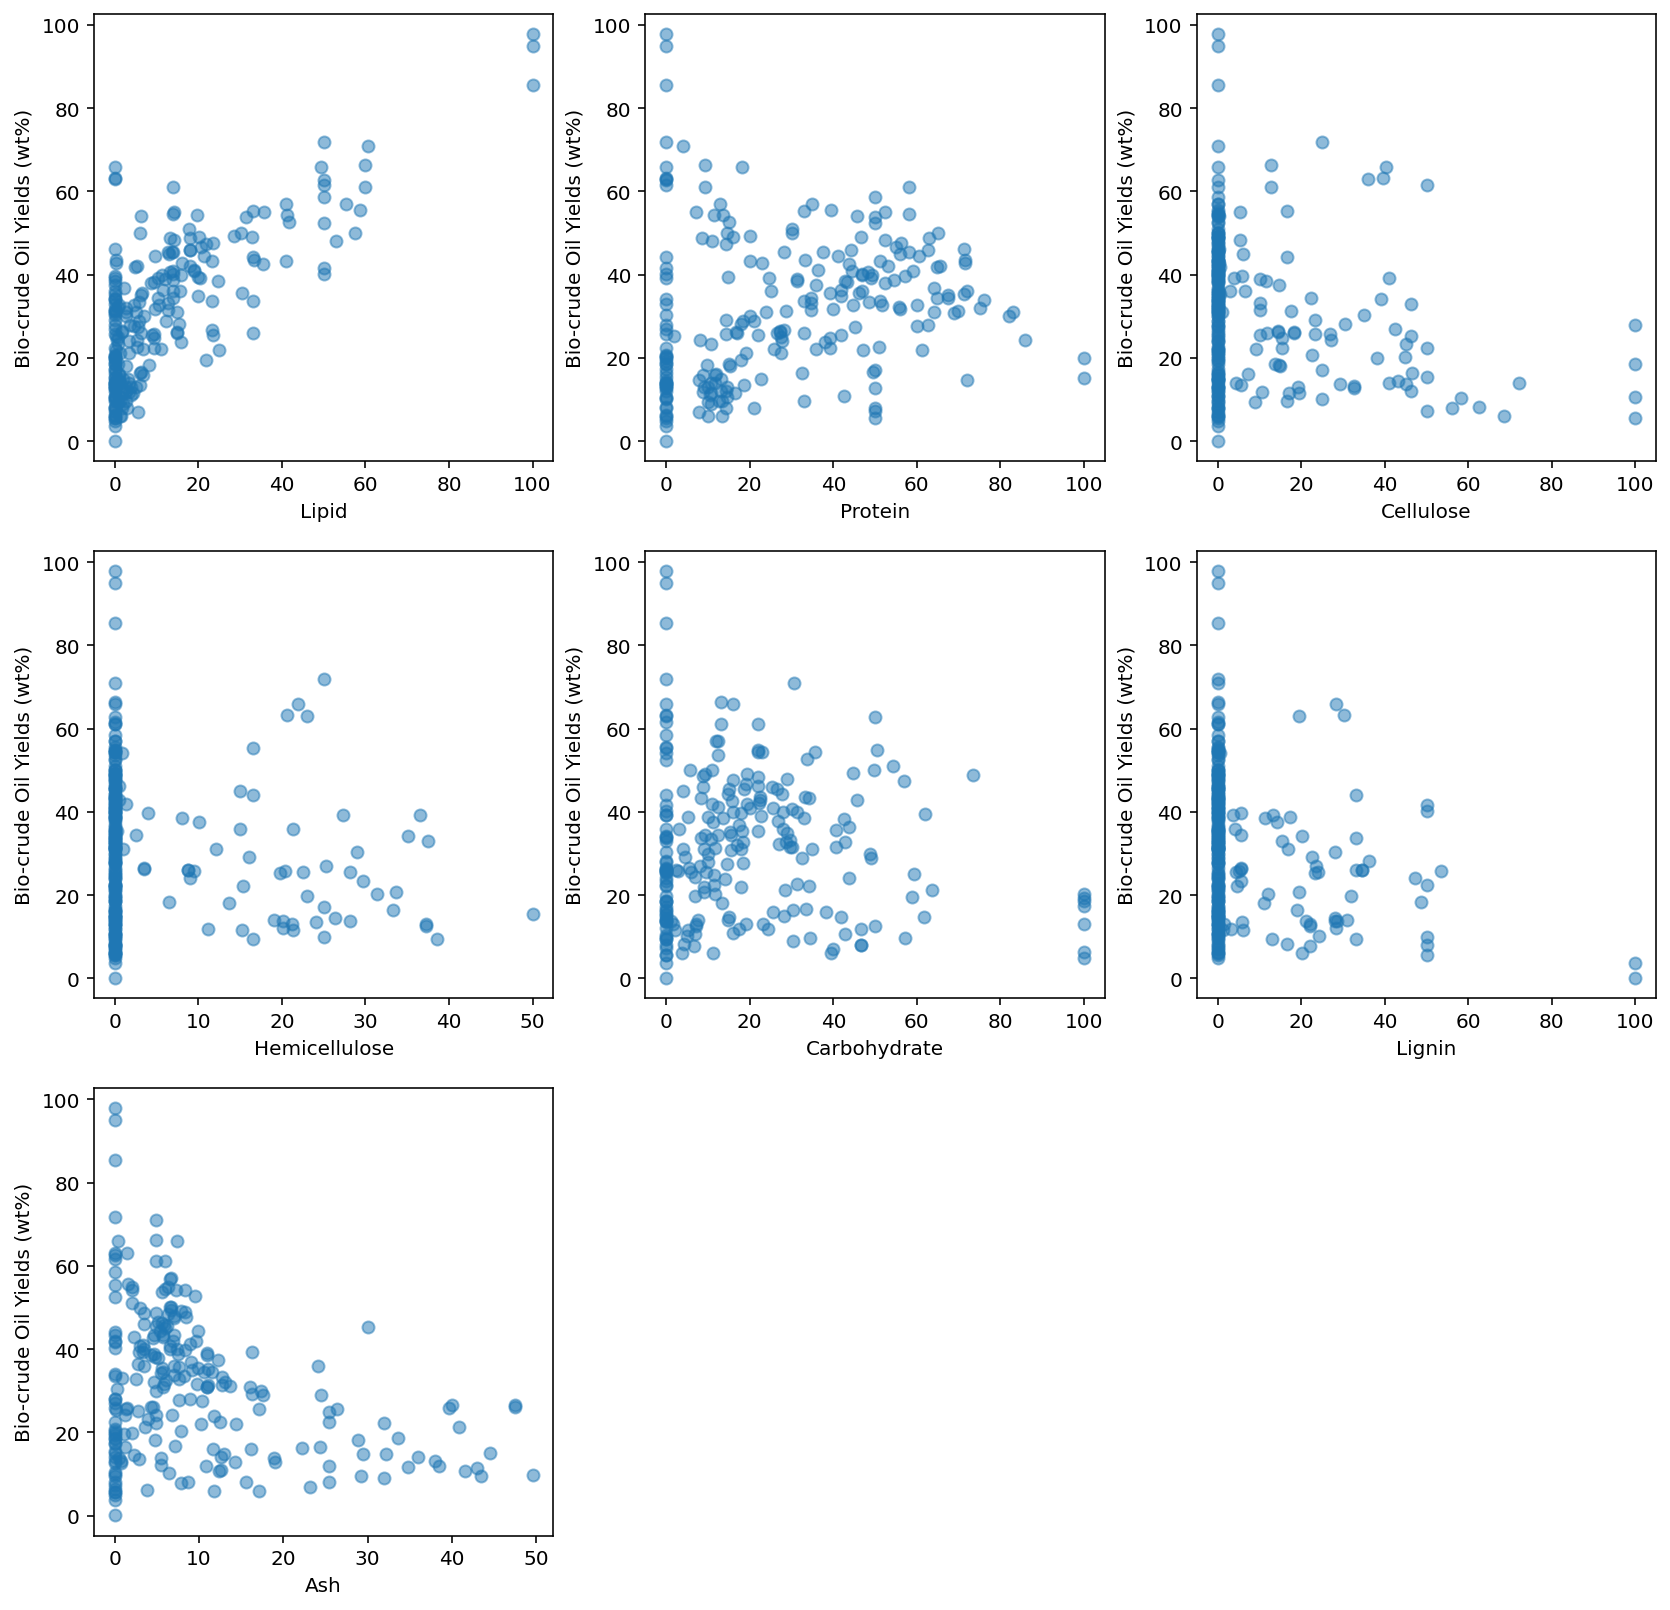

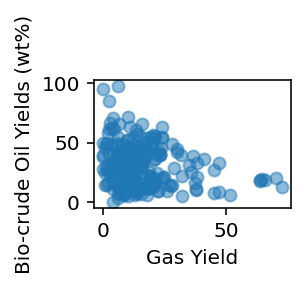

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(14,14))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(337)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

plt.subplot(338)
plt.xlabel('Gas Yield')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Gas Yield'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

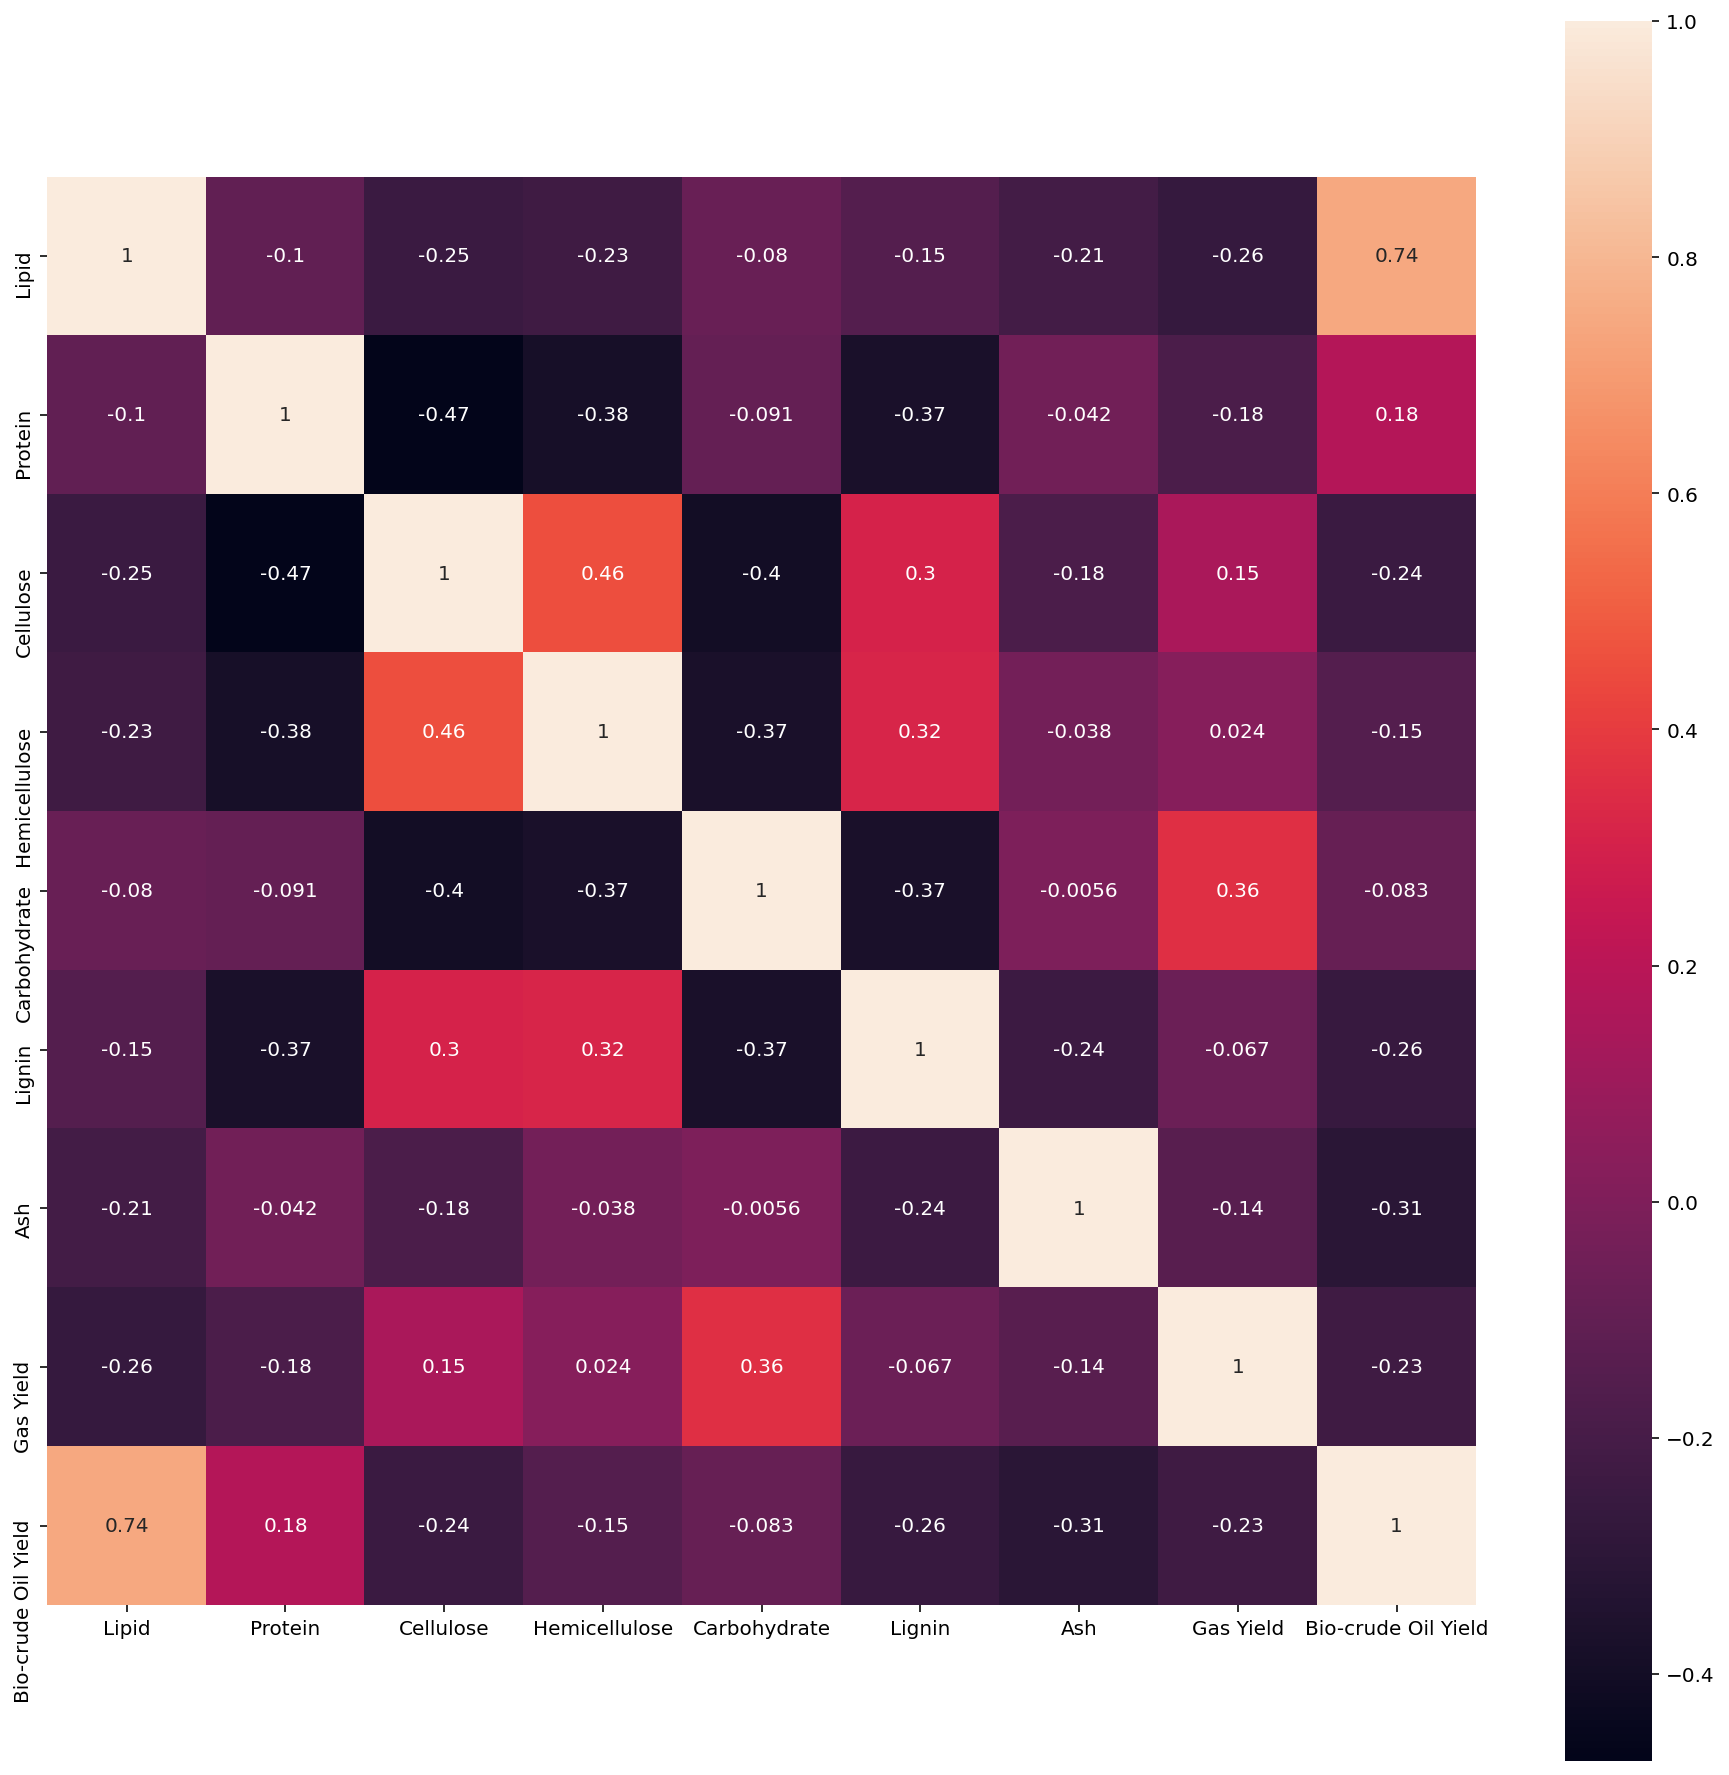

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(16,16))
sns.heatmap(data_figure.corr(),vmax=1,square=True,annot=True)
plt.show()

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use.
for i in range(0,201,1):
  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'Stratified KFold'
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=i)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  df = pd.concat([Features, Oil_Yields], axis=1)
  
  # Lets split the data into 10 folds. 
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=26)
  
  group = df.loc[:,'Group']
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  MRE_train_all=[]
  MRE_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for train_index, test_index in skf.split(df, group):
    
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    
    X_train=train.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_train=train['Bio-crude Oil Yield']
    
    X_test=test.drop(['Bio-crude Oil Yield','Group'], axis=1)
    y_test=test['Bio-crude Oil Yield']

    model = RandomForestRegressor()

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    
  # Predict validation set
  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  MRE_valid = performance_metric(y_valid, y_valid_predict)

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Difference Values of R2 of training and test sets", np.mean(r2_train_all)-np.mean(r2_test_all))
  print("Values of R2 of test set", r2_test_all)
  print("Difference Values of R2 Max and Min of test set", max(r2_test_all)-min(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print("")
  #print("Mean value of MRE of training set", np.mean(MRE_train_all))
  #print("Mean value of MRE of test set", np.mean(MRE_test_all))
  #print("Difference Values of MRE of training and test sets", np.mean(MRE_train_all)-np.mean(MRE_test_all))
  #print("Values of MRE of test set", MRE_test_all)
  #print("Difference Values of MRE Max and Min of test set", max(MRE_test_all)-min(MRE_test_all))
  #print("Optimal model has MRE of valid set:", MRE_valid)

In [ ]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)
    
  model = RandomForestRegressor(random_state=33)
  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_HHV)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 0.9617753447555144
Standard deviation of MAE of training set 0.035790188267915475
Mean value of MAE of test set 2.3554269154278598
Standard deviation of MAE of test set 0.29995962404908016

Mean value of RMSE of training set 1.3756993127074113
Standard deviation of RMSE of training set 0.053010329193113936
Mean value of RMSE of test set 3.3461924283066673
Standard deviation of RMSE of test set 0.4717645530299286

Mean value of R2 of training set 0.8862158088439377
Standard deviation of R2 of training set 0.007653001850003365
Mean value of R2 of test set 0.30503547520974766
Standard deviation of R2 of test set 0.1764755661627556

Mean value of MRE of training set 0.02851800549447523
Standard deviation of MRE of training set 0.0010673421905173061
Mean value of MRE of test set 0.0698303629366307
Standard deviation of MRE of test set 0.008963251663306814

Optimal model has MAE of valid set: 2.604894160704216
Optimal model has RMSE of valid set: 3.436774706

Text(0.5, 1.0, 'y_pred vs. y_true')

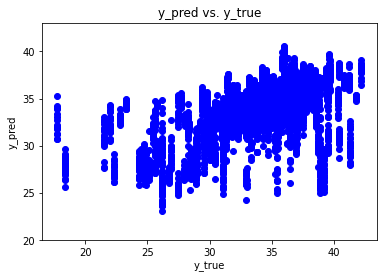

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(20, 43)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

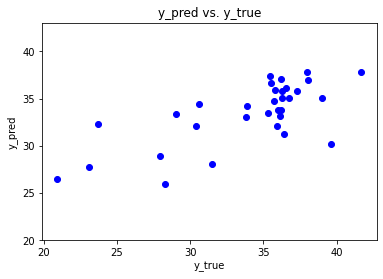

In [ ]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(20, 43)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 200, 11)

for j in range(10, 200, 10):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':j,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_depth 参数的最佳取值(1, 20, 1)

for j in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':j,'min_samples_leaf':1,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_leaf 参数的最佳取值(1, 3, 1)

for j in range(1, 3, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':j,'min_samples_split':2,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_samples_split 参数的最佳取值(2, 5, 20)

for j in range(2, 5, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':j,'max_features':6,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_features 参数的最佳取值(1, 8, 1)

for j in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':j,'random_state':33}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# random_state 参数的最佳取值(1, 201, 1)

for i in range(1, 201, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':2,'random_state':j}

    model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [3]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)
  
  #params = {'n_estimators':120,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':2,'random_state':33}
  params = {'n_estimators':190,'max_depth':12,'min_samples_leaf':1,'min_samples_split':4,'max_features':1,'random_state':132}

  model = RandomForestRegressor(**params)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
model.fit(Features_new, Oil_HHV)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 1.2930808267155554
Standard deviation of MAE of training set 0.04378017373421295
Mean value of MAE of test set 2.342003171916319
Standard deviation of MAE of test set 0.2691207087444812

Mean value of RMSE of training set 1.7874240217156976
Standard deviation of RMSE of training set 0.06333685223005733
Mean value of RMSE of test set 3.251769836348256
Standard deviation of RMSE of test set 0.4386431863881843

Mean value of R2 of training set 0.807939307214395
Standard deviation of R2 of training set 0.01184483586975268
Mean value of R2 of test set 0.34754351114990206
Standard deviation of R2 of test set 0.14239312410551047

Mean value of MRE of training set 0.038341348654404694
Standard deviation of MRE of training set 0.0012980948049490615
Mean value of MRE of test set 0.0694383542029543
Standard deviation of MRE of test set 0.008115850119959876

Optimal model has MAE of valid set: 2.6766460062873616
Optimal model has RMSE of valid set: 3.4606072834913

Text(0.5, 1.0, 'y_pred vs. y_true')

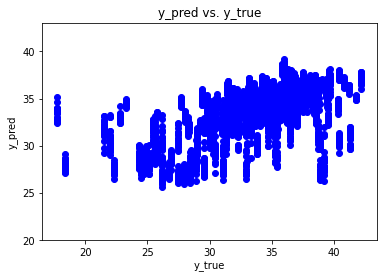

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(20, 43)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

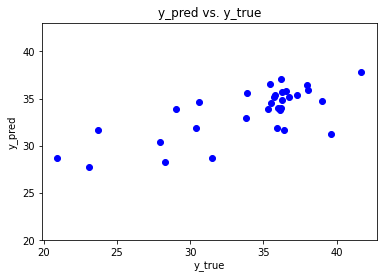

In [7]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(20, 43)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_valid_predict,'Test Data':y_valid}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_test_set_RFR_opt.csv', index = False, header=True)

 1) Lipid                          0.183272
 2) Protein                        0.168694
 3) Cellulose                      0.138411
 4) Ash                            0.132024
 5) Lignin                         0.131581
 6) Carbohydrate                   0.125640
 7) Hemicellulose                  0.120377


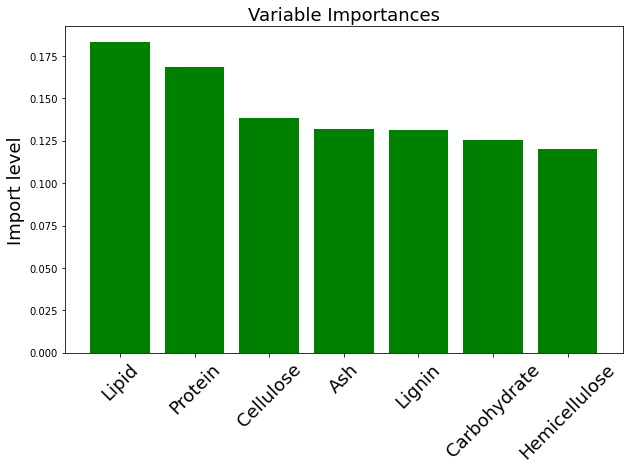

In [6]:
import matplotlib.pyplot as plt

Features = Original_Features.drop('Group', axis=1)

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Biocrude Yield RF Variable Importances.png')